<h1><center> 
    Neural network design and application
</center></h1>

<h2><center>CPT_S 434/534, 2022 Spring</center></h2>

<h2><center>HW 2: NN basics -- Part 2 (68 pts)</center></h2>

### Name: *[INPUT YOUR NAME HERE]*

## This assignment includes:

## Coding in Python (pytorch): train softmax classifiers on MNIST (68 points)

Step 0: Install and configure: python ([Anaconda platform](https://docs.anaconda.com/anaconda/install/) recommended), [Jupyter Notebook](https://jupyter.org/install) and [pytorch](https://pytorch.org/get-started/) 

**Remark 1.** [Colab](https://colab.research.google.com) is a cloud platform that enables your Jupyter Notebooks (including this .ipynb assignment) to run with different runtime types (hardware acceleration is possible using GPU or TPU). You may also choose Colab to finish assignments (future assignments may require extensive computation that may be time-consuming on your laptop). 

**Remark 2.** If you use Colab, it is still required to convert your .ipynb to .html and submit **BOTH** files to Canvas. See [this page](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) on how to convert to .html

Step 1: Read provided code (with pytorch) to understand the logic of MLP with one hidden layer, so that you know how to implement in the following step and how to re-use the provided code

Step 2: Complete the code of MLP with two hidden layer of softmax classifier on [MNIST](http://yann.lecun.com/exdb/mnist/) using different hyper-parameters.

Step 3: Record and plot results to show accuracy convergence (against #epoch)

## Submission:

* Convert the .ipynb file to .html file (**save the execution outputs** to show your progress: otherwise grading may be affected)
    
* Upload **both** your .ipynb and .html files to Canvas.

* Deadline: Feb 20, 11:59 PM, Pacific time.

* Plots should be clear and easy to read.

## 1. (Read and run) Train feedforward networks with one hidden layer (one activation layer)

Epoch [1/10], Step [100/600], Loss: 0.3277
Epoch [1/10], Step [200/600], Loss: 0.3044
Epoch [1/10], Step [300/600], Loss: 0.2675
Epoch [1/10], Step [400/600], Loss: 0.2531
Epoch [1/10], Step [500/600], Loss: 0.1494
Epoch [1/10], Step [600/600], Loss: 0.0983
Accuracy of the network on the 10000 test images: 95.64 %
Accuracy of the network on the training images: 95.935 %
Epoch [2/10], Step [100/600], Loss: 0.2676
Epoch [2/10], Step [200/600], Loss: 0.2025
Epoch [2/10], Step [300/600], Loss: 0.1491
Epoch [2/10], Step [400/600], Loss: 0.1728
Epoch [2/10], Step [500/600], Loss: 0.0852
Epoch [2/10], Step [600/600], Loss: 0.1891
Accuracy of the network on the 10000 test images: 97.21 %
Accuracy of the network on the training images: 97.90333333333334 %
Epoch [3/10], Step [100/600], Loss: 0.0906
Epoch [3/10], Step [200/600], Loss: 0.0683
Epoch [3/10], Step [300/600], Loss: 0.0618
Epoch [3/10], Step [400/600], Loss: 0.0794
Epoch [3/10], Step [500/600], Loss: 0.1135
Epoch [3/10], Step [600/600]

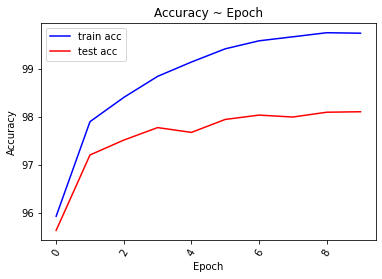

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy

# Device configuration: check if there is a configured GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784        # 28 * 28
hidden_size = 500       # the output dimension of the linear model in each MLP hidden layer
num_classes = 10        # the number of classes
num_epochs = 10         # the number of epochs (each epoch: scanning the entire training set)
batch_size = 100        # how many samples are used in each iteration of SGD/Adam update
learning_rate = 0.001   # learning rate or step size used in gradient-based optimization algorithm

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define a model using class NeuralNet()
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Define loss function and optimization algorithm (optimizer)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model
# train_acc_list, test_acc_list = [],[]
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model and plot training/testing accuracy
    # In test phase, we don't need to compute gradients 
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)
            
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()
        
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2. (To finish, 17 pts) Implement and train a feedforward network with two hidden layers (one hidden layer means [one linear layer + one nonlinear activation function layer], so make sure you have two activation layers)

After training: plot training and testing accuracy (against #epoches) 

Hint: modify class NeuralNet

In [2]:
# Your code goes here
# 
# Hint: no need to implement the entire training process as in HW1. 
# Simply modify the above provided code, particularly "class NeuralNet()".
# For example, copy the above "class NeuralNet()" in this cell,
# and modify the functions "__initi__()" and "forward()" to re-define its structure.
# After modifying "class NeuralNet()", copy all necessary code to train on your code,
# including: define a model from class NeuralNet, define loss function and optimizer,
# training for-loops and plot figures
# 
# 

def train(model, optimizer, message = ""):
    print("=========================================================")
    print(message)
    # Define loss function and optimization algorithm (optimizer)
    criterion = nn.CrossEntropyLoss()

    # Train the model
    # train_acc_list, test_acc_list = [],[]
    total_step = len(train_loader)
    test_acc_list, train_acc_list = [], []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model and plot training/testing accuracy
        # In test phase, we don't need to compute gradients 
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
            test_acc_list.append(100 * correct / total)

            
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in train_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
            train_acc_list.append(100 * correct / total)
                
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch')
    # plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
            
    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/10], Step [100/600], Loss: 0.2800
Epoch [1/10], Step [200/600], Loss: 0.3231
Epoch [1/10], Step [300/600], Loss: 0.1194
Epoch [1/10], Step [400/600], Loss: 0.1956
Epoch [1/10], Step [500/600], Loss: 0.0936
Epoch [1/10], Step [600/600], Loss: 0.1101
Accuracy of the network on the 10000 test images: 95.35 %
Accuracy of the network on the training images: 95.695 %
Epoch [2/10], Step [100/600], Loss: 0.0723
Epoch [2/10], Step [200/600], Loss: 0.1148
Epoch [2/10], Step [300/600], Loss: 0.0548
Epoch [2/10], Step [400/600], Loss: 0.1180
Epoch [2/10], Step [500/600], Loss: 0.1123
Epoch [2/10], Step [600/600], Loss: 0.0456
Accuracy of the network on the 10000 test images: 96.77 %
Accuracy of the network on the training images: 97.645 %
Epoch [3/10], Step [100/600], Loss: 0.0612
Epoch [3/10], Step [200/600], Loss: 0.0373
Epoch [3/10], Step [300/600], Loss: 0.0417
Epoch [3/10], Step [400/600], Loss: 0.0775
Epoch [3/10], Step [500/600], Loss: 0.1354
Epoch [3/10], Step [600/600], Loss: 0.

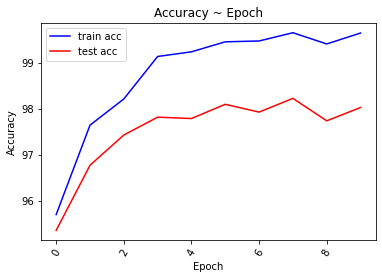

In [3]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        out = self.fc3(out)
        return out

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer)

## 3. (To finish, 3 pts) Use SGD (instead of Adam) to train your two-hidden-layer network

Hint: read [this document](https://pytorch.org/docs/stable/optim.html) for torch.optim and take a look at their *example* to understand how to change optimization algorithm. Hyper-parameters of optimization can be the same with the provided code


Epoch [1/10], Step [100/600], Loss: 0.0077
Epoch [1/10], Step [200/600], Loss: 0.0044
Epoch [1/10], Step [300/600], Loss: 0.0408
Epoch [1/10], Step [400/600], Loss: 0.0144
Epoch [1/10], Step [500/600], Loss: 0.0033
Epoch [1/10], Step [600/600], Loss: 0.0023
Accuracy of the network on the 10000 test images: 98.07 %
Accuracy of the network on the training images: 99.69833333333334 %
Epoch [2/10], Step [100/600], Loss: 0.0122
Epoch [2/10], Step [200/600], Loss: 0.0106
Epoch [2/10], Step [300/600], Loss: 0.0081
Epoch [2/10], Step [400/600], Loss: 0.0007
Epoch [2/10], Step [500/600], Loss: 0.0022
Epoch [2/10], Step [600/600], Loss: 0.0061
Accuracy of the network on the 10000 test images: 98.09 %
Accuracy of the network on the training images: 99.71333333333334 %
Epoch [3/10], Step [100/600], Loss: 0.0204
Epoch [3/10], Step [200/600], Loss: 0.0063
Epoch [3/10], Step [300/600], Loss: 0.0177
Epoch [3/10], Step [400/600], Loss: 0.0010
Epoch [3/10], Step [500/600], Loss: 0.0178
Epoch [3/10], St

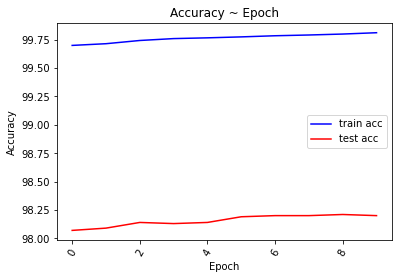

In [4]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer)

## 4. (To finish, 3 pts each setting, 15 pts in total) Use SGD to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 0.0017
Epoch [1/10], Step [200/600], Loss: 0.0043
Epoch [1/10], Step [300/600], Loss: 0.0005
Epoch [1/10], Step [400/600], Loss: 0.0201
Epoch [1/10], Step [500/600], Loss: 0.0266
Epoch [1/10], Step [600/600], Loss: 0.0114
Accuracy of the network on the 10000 test images: 98.2 %
Accuracy of the network on the training images: 99.81 %
Epoch [2/10], Step [100/600], Loss: 0.0022
Epoch [2/10], Step [200/600], Loss: 0.0039
Epoch [2/10], Step [300/600], Loss: 0.0007
Epoch [2/10], Step [400/600], Loss: 0.0008
Epoch [2/10], Step [500/600], Loss: 0.0453
Epoch [2/10], Step [600/600], Loss: 0.0018
Accuracy of the network on the 10000 test images: 98.2 %
Accuracy of the network on the training images: 99.81333333333333 %
Epoch [3/10], Step [100/600], Loss: 0.0070
Epoch [3/10], Step [200/600], Loss: 0.0041
Epoch [3/10], Step [300/600], Loss: 0.0034
Epoch [3/10], Step [400/600], Loss: 0.0070
Epoch [3/10], Step [500/600], Loss: 0.0074
Epoch [3/

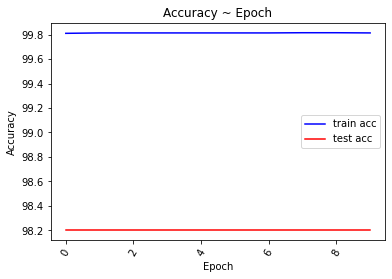

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 0.0021
Epoch [1/10], Step [200/600], Loss: 0.0004
Epoch [1/10], Step [300/600], Loss: 0.0114
Epoch [1/10], Step [400/600], Loss: 0.0222
Epoch [1/10], Step [500/600], Loss: 0.0063
Epoch [1/10], Step [600/600], Loss: 0.0276
Accuracy of the network on the 10000 test images: 98.21 %
Accuracy of the network on the training images: 99.81833333333333 %
Epoch [2/10], Step [100/600], Loss: 0.0018
Epoch [2/10], Step [200/600], Loss: 0.0130
Epoch [2/10], Step [300/600], Loss: 0.0014
Epoch [2/10], Step [400/600], Loss: 0.0019
Epoch [2/10], Step [500/600], Loss: 0.0061
Epoch [2/10], Step [600/600], Loss: 0.0010
Accuracy of the network on the 10000 test images: 98.2 %
Accuracy of the network on the training images: 99.825 %
Epoch [3/10], Step [100/600], Loss: 0.0020
Epoch [3/10], Step [200/600], Loss: 0.0036
Epoch [3/10], Step [300/600], Loss: 0.0021
Epoch [3/10], Step [400/600], Loss: 0.0026
Epoch [3/10], Step [500/600], Loss: 0.0016
Epoch [3

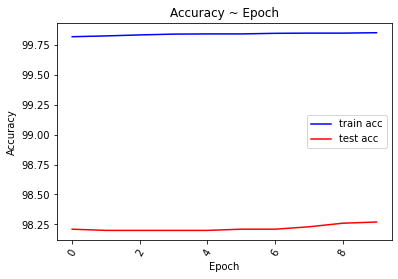

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 0.0038
Epoch [1/10], Step [200/600], Loss: 0.0003
Epoch [1/10], Step [300/600], Loss: 0.0048
Epoch [1/10], Step [400/600], Loss: 0.0046
Epoch [1/10], Step [500/600], Loss: 0.0006
Epoch [1/10], Step [600/600], Loss: 0.0105
Accuracy of the network on the 10000 test images: 98.33 %
Accuracy of the network on the training images: 99.88 %
Epoch [2/10], Step [100/600], Loss: 0.0304
Epoch [2/10], Step [200/600], Loss: 0.0090
Epoch [2/10], Step [300/600], Loss: 0.0018
Epoch [2/10], Step [400/600], Loss: 0.0068
Epoch [2/10], Step [500/600], Loss: 0.0014
Epoch [2/10], Step [600/600], Loss: 0.0011
Accuracy of the network on the 10000 test images: 98.3 %
Accuracy of the network on the training images: 99.89333333333333 %
Epoch [3/10], Step [100/600], Loss: 0.0164
Epoch [3/10], Step [200/600], Loss: 0.0141
Epoch [3/10], Step [300/600], Loss: 0.0007
Epoch [3/10], Step [400/600], Loss: 0.0290
Epoch [3/10], Step [500/600], Loss: 0.0002
Epoch [3/1

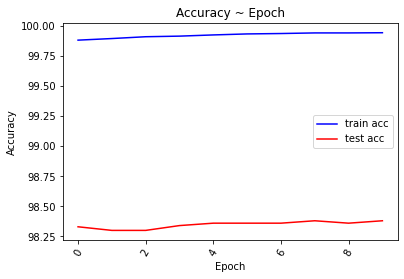

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 0.0003
Epoch [1/10], Step [200/600], Loss: 0.0008
Epoch [1/10], Step [300/600], Loss: 0.0101
Epoch [1/10], Step [400/600], Loss: 0.0018
Epoch [1/10], Step [500/600], Loss: 0.0008
Epoch [1/10], Step [600/600], Loss: 0.0015
Accuracy of the network on the 10000 test images: 98.41 %
Accuracy of the network on the training images: 99.96833333333333 %
Epoch [2/10], Step [100/600], Loss: 0.0014
Epoch [2/10], Step [200/600], Loss: 0.0040
Epoch [2/10], Step [300/600], Loss: 0.0007
Epoch [2/10], Step [400/600], Loss: 0.0009
Epoch [2/10], Step [500/600], Loss: 0.0008
Epoch [2/10], Step [600/600], Loss: 0.0011
Accuracy of the network on the 10000 test images: 98.39 %
Accuracy of the network on the training images: 99.98 %
Epoch [3/10], Step [100/600], Loss: 0.0023
Epoch [3/10], Step [200/600], Loss: 0.0016
Epoch [3/10], Step [300/600], Loss: 0.0012
Epoch [3/10], Step [400/600], Loss: 0.0009
Epoch [3/10], Step [500/600], Loss: 0.0010
Epoch [3/1

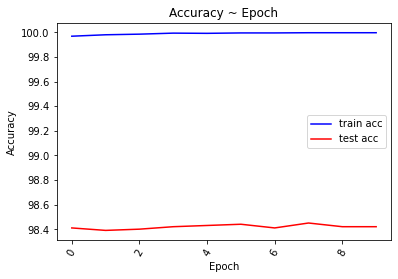

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 0.0020
Epoch [1/10], Step [200/600], Loss: 0.0005
Epoch [1/10], Step [300/600], Loss: 0.0014
Epoch [1/10], Step [400/600], Loss: 0.0008
Epoch [1/10], Step [500/600], Loss: 0.0007
Epoch [1/10], Step [600/600], Loss: 0.0007
Accuracy of the network on the 10000 test images: 98.4 %
Accuracy of the network on the training images: 99.97833333333334 %
Epoch [2/10], Step [100/600], Loss: 0.0010
Epoch [2/10], Step [200/600], Loss: 0.0005
Epoch [2/10], Step [300/600], Loss: 0.0002
Epoch [2/10], Step [400/600], Loss: 0.0002
Epoch [2/10], Step [500/600], Loss: 0.0012
Epoch [2/10], Step [600/600], Loss: 0.0002
Accuracy of the network on the 10000 test images: 98.5 %
Accuracy of the network on the training images: 99.99 %
Epoch [3/10], Step [100/600], Loss: 0.0012
Epoch [3/10], Step [200/600], Loss: 0.0008
Epoch [3/10], Step [300/600], Loss: 0.0006
Epoch [3/10], Step [400/600], Loss: 0.0007
Epoch [3/10], Step [500/600], Loss: 0.0013
Epoch [3/10], 

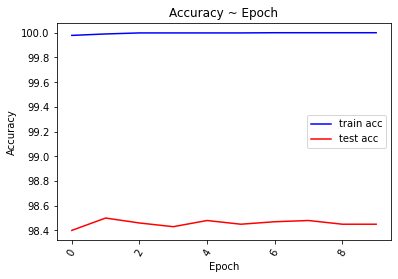

In [5]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.0001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.01")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.1")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 1")


## 5. (To finish, 3 pts each setting, 15 pts in total) Use Adam to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 0.0002
Epoch [1/10], Step [200/600], Loss: 0.0011
Epoch [1/10], Step [300/600], Loss: 0.0007
Epoch [1/10], Step [400/600], Loss: 0.0003
Epoch [1/10], Step [500/600], Loss: 0.0004
Epoch [1/10], Step [600/600], Loss: 0.0015
Accuracy of the network on the 10000 test images: 98.37 %
Accuracy of the network on the training images: 100.0 %
Epoch [2/10], Step [100/600], Loss: 0.0001
Epoch [2/10], Step [200/600], Loss: 0.0002
Epoch [2/10], Step [300/600], Loss: 0.0007
Epoch [2/10], Step [400/600], Loss: 0.0002
Epoch [2/10], Step [500/600], Loss: 0.0007
Epoch [2/10], Step [600/600], Loss: 0.0010
Accuracy of the network on the 10000 test images: 98.42 %
Accuracy of the network on the training images: 100.0 %
Epoch [3/10], Step [100/600], Loss: 0.0005
Epoch [3/10], Step [200/600], Loss: 0.0008
Epoch [3/10], Step [300/600], Loss: 0.0007
Epoch [3/10], Step [400/600], Loss: 0.0006
Epoch [3/10], Step [500/600], Loss: 0.0004
Epoch [3/10], Step 

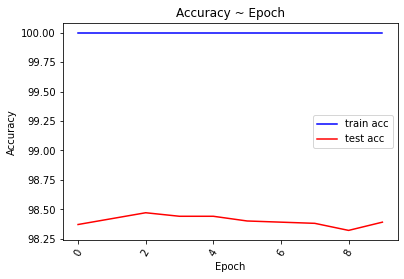

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 0.0048
Epoch [1/10], Step [200/600], Loss: 0.0303
Epoch [1/10], Step [300/600], Loss: 0.1079
Epoch [1/10], Step [400/600], Loss: 0.0862
Epoch [1/10], Step [500/600], Loss: 0.0339
Epoch [1/10], Step [600/600], Loss: 0.0694
Accuracy of the network on the 10000 test images: 98.11 %
Accuracy of the network on the training images: 99.63833333333334 %
Epoch [2/10], Step [100/600], Loss: 0.0041
Epoch [2/10], Step [200/600], Loss: 0.0114
Epoch [2/10], Step [300/600], Loss: 0.0015
Epoch [2/10], Step [400/600], Loss: 0.0419
Epoch [2/10], Step [500/600], Loss: 0.0021
Epoch [2/10], Step [600/600], Loss: 0.0076
Accuracy of the network on the 10000 test images: 97.88 %
Accuracy of the network on the training images: 99.55666666666667 %
Epoch [3/10], Step [100/600], Loss: 0.0013
Epoch [3/10], Step [200/600], Loss: 0.0249
Epoch [3/10], Step [300/600], Loss: 0.0525
Epoch [3/10], Step [400/600], Loss: 0.0038
Epoch [3/10], Step [500/600], Loss: 0.0

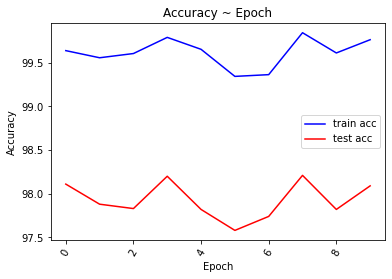

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 0.1164
Epoch [1/10], Step [200/600], Loss: 0.0747
Epoch [1/10], Step [300/600], Loss: 0.0769
Epoch [1/10], Step [400/600], Loss: 0.0729
Epoch [1/10], Step [500/600], Loss: 0.1519
Epoch [1/10], Step [600/600], Loss: 0.2569
Accuracy of the network on the 10000 test images: 97.12 %
Accuracy of the network on the training images: 97.98666666666666 %
Epoch [2/10], Step [100/600], Loss: 0.0671
Epoch [2/10], Step [200/600], Loss: 0.1261
Epoch [2/10], Step [300/600], Loss: 0.1988
Epoch [2/10], Step [400/600], Loss: 0.0946
Epoch [2/10], Step [500/600], Loss: 0.0225
Epoch [2/10], Step [600/600], Loss: 0.1490
Accuracy of the network on the 10000 test images: 97.46 %
Accuracy of the network on the training images: 98.465 %
Epoch [3/10], Step [100/600], Loss: 0.1280
Epoch [3/10], Step [200/600], Loss: 0.0523
Epoch [3/10], Step [300/600], Loss: 0.0381
Epoch [3/10], Step [400/600], Loss: 0.0696
Epoch [3/10], Step [500/600], Loss: 0.0460
Epoch [3

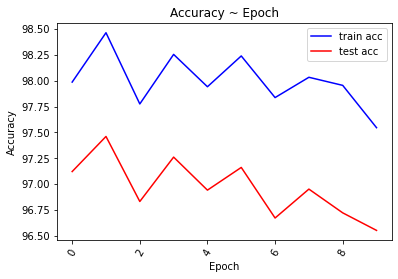

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 1.1970
Epoch [1/10], Step [200/600], Loss: 1.1251
Epoch [1/10], Step [300/600], Loss: 2.8880
Epoch [1/10], Step [400/600], Loss: 1.9423
Epoch [1/10], Step [500/600], Loss: 2.1245
Epoch [1/10], Step [600/600], Loss: 2.6157
Accuracy of the network on the 10000 test images: 44.93 %
Accuracy of the network on the training images: 44.718333333333334 %
Epoch [2/10], Step [100/600], Loss: 2.6806
Epoch [2/10], Step [200/600], Loss: 2.6704
Epoch [2/10], Step [300/600], Loss: 2.4739
Epoch [2/10], Step [400/600], Loss: 3.2225
Epoch [2/10], Step [500/600], Loss: 2.7638
Epoch [2/10], Step [600/600], Loss: 2.6089
Accuracy of the network on the 10000 test images: 29.72 %
Accuracy of the network on the training images: 30.608333333333334 %
Epoch [3/10], Step [100/600], Loss: 3.1059
Epoch [3/10], Step [200/600], Loss: 7.1703
Epoch [3/10], Step [300/600], Loss: 3.4350
Epoch [3/10], Step [400/600], Loss: 18.3858
Epoch [3/10], Step [500/600], Loss: 3.

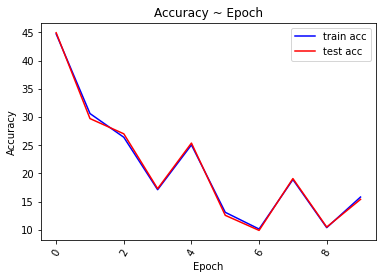

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 104.6546
Epoch [1/10], Step [200/600], Loss: 108.2990
Epoch [1/10], Step [300/600], Loss: 177.2160
Epoch [1/10], Step [400/600], Loss: 171.2856
Epoch [1/10], Step [500/600], Loss: 138.1760
Epoch [1/10], Step [600/600], Loss: 167.0594
Accuracy of the network on the 10000 test images: 10.28 %
Accuracy of the network on the training images: 10.441666666666666 %
Epoch [2/10], Step [100/600], Loss: 154.1854
Epoch [2/10], Step [200/600], Loss: 131.6514
Epoch [2/10], Step [300/600], Loss: 170.9089
Epoch [2/10], Step [400/600], Loss: 240.4480
Epoch [2/10], Step [500/600], Loss: 97.3696
Epoch [2/10], Step [600/600], Loss: 94.4172
Accuracy of the network on the 10000 test images: 10.09 %
Accuracy of the network on the training images: 9.915 %
Epoch [3/10], Step [100/600], Loss: 103.5372
Epoch [3/10], Step [200/600], Loss: 163.0077
Epoch [3/10], Step [300/600], Loss: 100.0718
Epoch [3/10], Step [400/600], Loss: 155.5123
Epoch [3/10], Step [500/

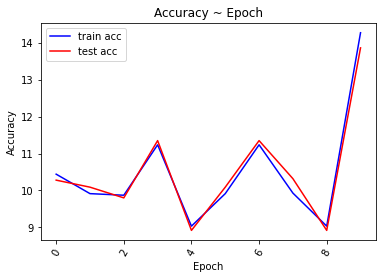

In [6]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.0001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.01")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.1")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 1")

## 6. (To finish, 3 pts each setting, 9 pts in total) Change the dimension of the hidden variable (*hidden_size*) from $500$ to $100, 1000, 2000$, train the corresponding networks, and show the difference of them in testing accuracy.

Hint: you may use exactly the same setting with the above section 1, e.g., still use Adam with original setting for optimization

hidden_size: 100
Epoch [1/10], Step [100/600], Loss: 0.3918
Epoch [1/10], Step [200/600], Loss: 0.3699
Epoch [1/10], Step [300/600], Loss: 0.2663
Epoch [1/10], Step [400/600], Loss: 0.2691
Epoch [1/10], Step [500/600], Loss: 0.2649
Epoch [1/10], Step [600/600], Loss: 0.1912
Accuracy of the network on the 10000 test images: 93.8 %
Accuracy of the network on the training images: 93.89666666666666 %
Epoch [2/10], Step [100/600], Loss: 0.3317
Epoch [2/10], Step [200/600], Loss: 0.1444
Epoch [2/10], Step [300/600], Loss: 0.2951
Epoch [2/10], Step [400/600], Loss: 0.1382
Epoch [2/10], Step [500/600], Loss: 0.1084
Epoch [2/10], Step [600/600], Loss: 0.2882
Accuracy of the network on the 10000 test images: 95.32 %
Accuracy of the network on the training images: 95.59333333333333 %
Epoch [3/10], Step [100/600], Loss: 0.1163
Epoch [3/10], Step [200/600], Loss: 0.1491
Epoch [3/10], Step [300/600], Loss: 0.0586
Epoch [3/10], Step [400/600], Loss: 0.1249
Epoch [3/10], Step [500/600], Loss: 0.0472
E

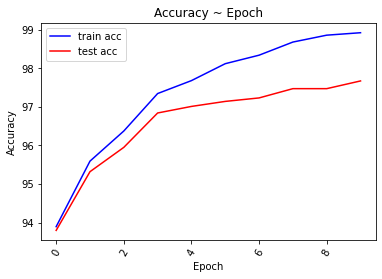

hidden_size: 1000
Epoch [1/10], Step [100/600], Loss: 0.3385
Epoch [1/10], Step [200/600], Loss: 0.1559
Epoch [1/10], Step [300/600], Loss: 0.1776
Epoch [1/10], Step [400/600], Loss: 0.1428
Epoch [1/10], Step [500/600], Loss: 0.1587
Epoch [1/10], Step [600/600], Loss: 0.1169
Accuracy of the network on the 10000 test images: 96.38 %
Accuracy of the network on the training images: 96.765 %
Epoch [2/10], Step [100/600], Loss: 0.1515
Epoch [2/10], Step [200/600], Loss: 0.0694
Epoch [2/10], Step [300/600], Loss: 0.1046
Epoch [2/10], Step [400/600], Loss: 0.0664
Epoch [2/10], Step [500/600], Loss: 0.1394
Epoch [2/10], Step [600/600], Loss: 0.0724
Accuracy of the network on the 10000 test images: 97.2 %
Accuracy of the network on the training images: 98.14666666666666 %
Epoch [3/10], Step [100/600], Loss: 0.0676
Epoch [3/10], Step [200/600], Loss: 0.0237
Epoch [3/10], Step [300/600], Loss: 0.0484
Epoch [3/10], Step [400/600], Loss: 0.0121
Epoch [3/10], Step [500/600], Loss: 0.0596
Epoch [3/10

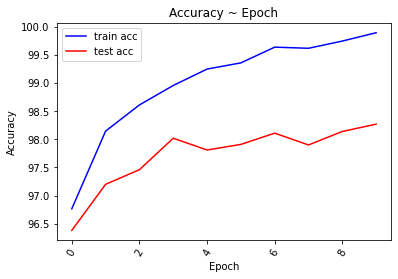

hidden_size: 2000
Epoch [1/10], Step [100/600], Loss: 0.2387
Epoch [1/10], Step [200/600], Loss: 0.1991
Epoch [1/10], Step [300/600], Loss: 0.2954
Epoch [1/10], Step [400/600], Loss: 0.2017
Epoch [1/10], Step [500/600], Loss: 0.1004
Epoch [1/10], Step [600/600], Loss: 0.0921
Accuracy of the network on the 10000 test images: 96.58 %
Accuracy of the network on the training images: 97.16166666666666 %
Epoch [2/10], Step [100/600], Loss: 0.1361
Epoch [2/10], Step [200/600], Loss: 0.0838
Epoch [2/10], Step [300/600], Loss: 0.0564
Epoch [2/10], Step [400/600], Loss: 0.0730
Epoch [2/10], Step [500/600], Loss: 0.0907
Epoch [2/10], Step [600/600], Loss: 0.0435
Accuracy of the network on the 10000 test images: 97.47 %
Accuracy of the network on the training images: 98.42 %
Epoch [3/10], Step [100/600], Loss: 0.0182
Epoch [3/10], Step [200/600], Loss: 0.0647
Epoch [3/10], Step [300/600], Loss: 0.0333
Epoch [3/10], Step [400/600], Loss: 0.0335
Epoch [3/10], Step [500/600], Loss: 0.0485
Epoch [3/10

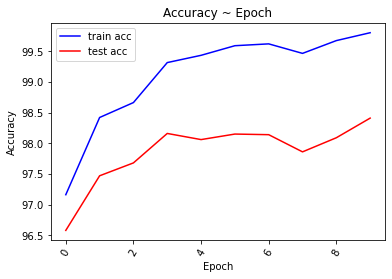

In [7]:
# Your code goes here

model = NeuralNet(input_size, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 100")

model = NeuralNet(input_size, 1000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 1000")

model = NeuralNet(input_size, 2000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 2000")

## 7. (To finish, 3 pts each question, 9 pts in total) Answer the following three questions

### Q1 (3 pts): Is the best learning rate for SGD the same with the best learning rate for Adam?

**Answer**:



### Q2 (3 pts): Read [this discussion](https://discuss.pytorch.org/t/how-does-sgd-weight-decay-work/33105/2) for the hyper-parameter of "weight decay" in optimizer and briefly describe how it works (hint: try to link it to anything we have learned in our class, such as the section of ML basic)

**Answer**:



### Q3 (3 pts): In the above section 6, how the dimension of hidden variable impacts the performance?

**Answer**:

